<a href="https://colab.research.google.com/github/jagvgithub/Classification_Regression_models/blob/main/Deteccion_trx_fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de información

In [1]:
from google.colab import files
import pandas as pd

# Cargar el archivo CSV
uploaded = files.upload()

Saving trx_fraude.csv to trx_fraude.csv


In [2]:
# Ruta al archivo xlsx en Google Colab
ruta_archivo = '/content/trx_fraude.csv'  # Asegúrate de que la ruta sea correcta según la ubicación del archivo cargado

# Leer el archivo xlsx usando pandas
datos = pd.read_csv(ruta_archivo,sep='|', encoding='latin1')
datos=pd.DataFrame(datos)

In [3]:
datos.shape

(58197, 26)

In [4]:
datos_numericos = datos.select_dtypes(include=['int', 'float'])

# Mostrar los tipos de datos de las columnas seleccionadas
print(datos_numericos.dtypes)

UTRNNO                  int64
TRANS_TYPE              int64
MSGTYPE                 int64
Cod_Aprovacion        float64
respuesta               int64
POS_ENTRY_MODE          int64
POS_CONDITION_CODE      int64
ECI                   float64
MCC                     int64
bin_amount            float64
country_number        float64
Testeos                 int64
Fraude                  int64
dtype: object


# transformación de formatos

In [5]:
columns_to_format = ['UTRNNO','TRANS_TYPE', 'MSGTYPE', 'Cod_Aprovacion', 'respuesta',
       'POS_ENTRY_MODE', 'POS_CONDITION_CODE', 'ECI', 'MCC',
       'country_number', 'Testeos']  # Lista de nombres de columnas a formatear

# Aplicar la transformación a las columnas seleccionadas
datos[columns_to_format] = datos[columns_to_format].applymap(lambda x: '{:.0f}'.format(x))

In [6]:
datos_numericos = datos.select_dtypes(include=['int', 'float'])

# Mostrar los tipos de datos de las columnas seleccionadas
print(datos_numericos.dtypes)

bin_amount    float64
Fraude          int64
dtype: object


In [7]:
print(datos.head())

         UTRNNO                    TTIME TRANS_TYPE    amount MSGTYPE  \
0  144770802315  2023-12-01T00:00:45.877        680   6500,00    1120   
1  144770802584  2023-12-01T00:01:06.663        774     20,00    1120   
2  144770802830  2023-12-01T00:01:26.387        680     13,57    1120   
3  144770803005  2023-12-01T00:01:38.193        680  27900,00    1120   
4  144770803143  2023-12-01T00:01:49.383        680     17,00    1120   

  Cod_Aprovacion respuesta POS_ENTRY_MODE POS_CONDITION_CODE  ECI  ...  \
0         305562        -1              1                 59    7  ...   
1            nan       953             10                  1  nan  ...   
2            nan       909              1                 59    7  ...   
3            nan       953             10                  8    2  ...   
4         145579        -1              1                 59    7  ...   

  bin_amount Tipo_Mensaje_description           Description Español  \
0    6500.00     Authorization Advice        

# Datos de entrenamiento y prueba del modelo

In [8]:
data=datos.sample(frac=0.75,random_state=786).reset_index(drop=True) # entrenamiento
data_unusen =datos.drop(data.index).reset_index(drop=True) # testeo

# Verificar el tamaño de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", data.shape)
print("Tamaño del conjunto de prueba:", data_unusen.shape)

Tamaño del conjunto de entrenamiento: (43648, 26)
Tamaño del conjunto de prueba: (14549, 26)


In [ ]:
!pip install pycaret
from pycaret.classification import * # la data ya tiene una marcacion de  01
#exp_clf101 = setup(data=data, target='Fraude', session_id=10001)  # Configurar el experimento de clasificación
#exp_clf101 = setup(data=data, target='Fraude', session_id=10001, fold_strategy='stratifiedkfold') # garantizar que todas las clases esten bien representadas

In [10]:
exp_clf101 = setup(data=data, target='Fraude', session_id=10001, fold_strategy='stratifiedkfold')

,Description,Value
0,Session id,10001
1,Target,Fraude
2,Target type,Binary
3,Original data shape,"(43648, 26)"
4,Transformed data shape,"(43648, 65)"
5,Transformed train set shape,"(30553, 65)"
6,Transformed test set shape,"(13095, 65)"
7,Numeric features,1
8,Categorical features,24
9,Rows with missing values,17.3%


# validación cruzada de los modelos de clasificación

In [11]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9386,0.9386,0.6429,0.8956,0.7477,0.7139,0.7271,6.4060
knn,K Neighbors Classifier,0.9172,0.8246,0.5469,0.8072,0.6515,0.6065,0.6216,3.0290
dt,Decision Tree Classifier,0.8582,0.5002,0.0005,0.2000,0.0009,0.0008,0.0089,1.7700
ridge,Ridge Classifier,0.8582,0.8972,0.0005,0.2000,0.0009,0.0008,0.0089,1.4190
et,Extra Trees Classifier,0.8582,0.6785,0.0005,0.2000,0.0009,0.0008,0.0089,2.6310
rf,Random Forest Classifier,0.8581,0.7584,0.0000,0.0000,0.0000,0.0000,0.0000,2.3780
qda,Quadratic Discriminant Analysis,0.8581,0.7292,0.0000,0.0000,0.0000,-0.0001,-0.0007,1.5630
ada,Ada Boost Classifier,0.8581,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.4200
gbc,Gradient Boosting Classifier,0.8581,0.5050,0.0000,0.0000,0.0000,0.0000,0.0000,3.7420
lda,Linear Discriminant Analysis,0.8581,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.5860


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# Creación del modelo: Testeo del modelo seleccionado creando 10 modelos para determinar la variabilidad

In [12]:
modelo = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9372,0.9377,0.6613,0.8645,0.7493,0.7142,0.7225
1,0.9421,0.9301,0.6452,0.9241,0.7598,0.7281,0.7433
2,0.9342,0.9424,0.6382,0.8629,0.7338,0.6972,0.7075
3,0.9345,0.9249,0.6097,0.8949,0.7253,0.6896,0.7060
4,0.9339,0.9354,0.6236,0.8738,0.7278,0.6913,0.7041
5,0.9502,0.9430,0.7067,0.9245,0.8010,0.7732,0.7823
6,0.9404,0.9491,0.6467,0.9061,0.7547,0.7219,0.7352
7,0.9401,0.9336,0.6443,0.9058,0.7530,0.7201,0.7336
8,0.9306,0.9348,0.5622,0.9173,0.6971,0.6605,0.6858


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

#  -> Hiperparametrización

In [13]:
tuned_modelo = tune_model(modelo)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9296,0.9189,0.5760,0.8897,0.6993,0.6615,0.6816
1,0.9483,0.9520,0.7327,0.8833,0.8010,0.7716,0.7760
2,0.9296,0.9263,0.5783,0.8869,0.7001,0.6623,0.6817
3,0.9349,0.9168,0.5935,0.9179,0.7209,0.6859,0.7069
4,0.9316,0.9349,0.6097,0.8684,0.7164,0.6789,0.6926
5,0.9453,0.9312,0.6721,0.9209,0.7770,0.7467,0.7588
6,0.9417,0.9444,0.6721,0.8899,0.7658,0.7333,0.7427
7,0.9434,0.9358,0.6697,0.9062,0.7703,0.7388,0.7498
8,0.9293,0.9406,0.5899,0.8707,0.7033,0.6648,0.6811


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Análisis curva ROC

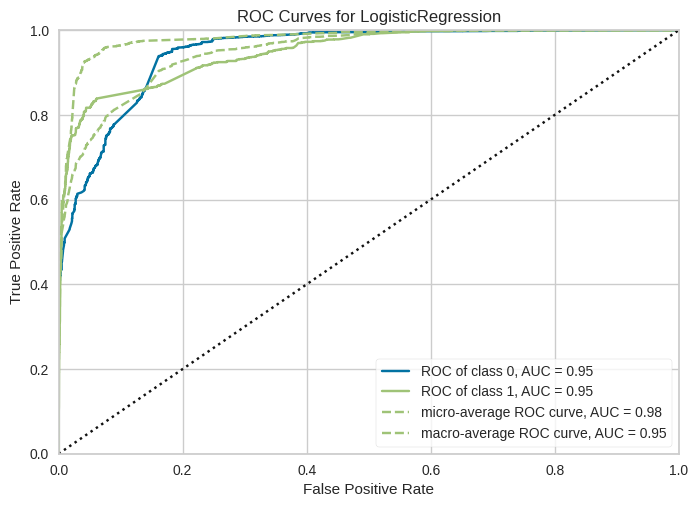

In [14]:
plot_model(tuned_modelo,plot='auc')

# Importancia de las variables

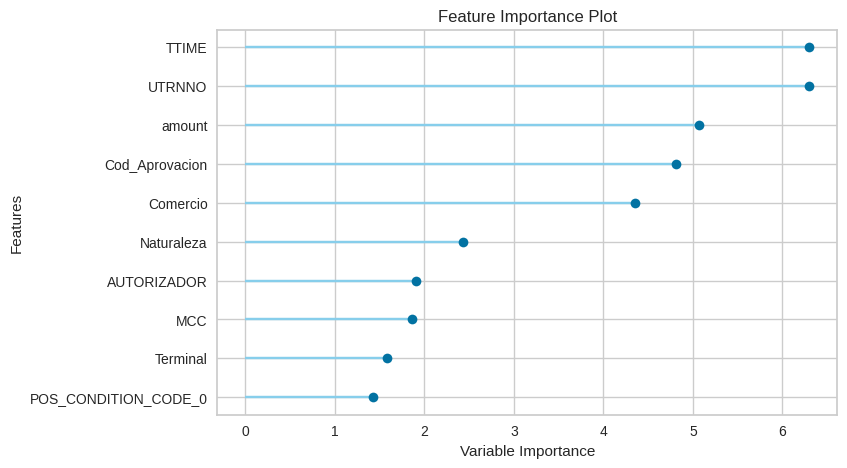

In [15]:
plot_model(tuned_modelo,plot='feature')

* El gráfico de límites (boundary plot) es una representación visual de cómo un modelo de clasificación divide un conjunto de datos en diferentes regiones en un espacio bidimensional. En este gráfico, cada punto de datos se coloca en un plano cartesiano donde los ejes representan dos características o variables específicas del conjunto de datos (llamadas "feature 1" y "feature 2"). Los puntos de datos se colorearán según su clase real.

* El modelo de clasificación aprendido traza líneas o curvas que separan las diferentes regiones del plano donde se predice una clase específica. Estos límites de decisión muestran dónde el modelo cambia de una clase a otra. Por lo tanto, el gráfico de límites permite visualizar cómo el modelo divide el espacio de características para realizar predicciones sobre nuevas observaciones.

* En resumen, el gráfico de límites proporciona una representación visual clara de cómo funciona un modelo de clasificación en un espacio de dos dimensiones, lo que facilita la comprensión de su comportamiento y su capacidad para separar las diferentes clases de datos.

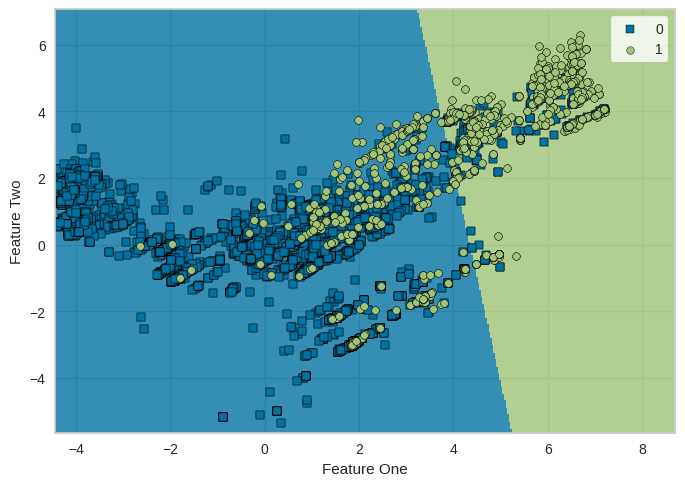

In [16]:
plot_model(tuned_modelo, plot = 'boundary')

* El gráfico de Precisión-Recuperación (Precision-Recall plot) es una herramienta comúnmente utilizada en problemas de clasificación binaria para evaluar el rendimiento de un modelo. En este gráfico, se representa la precisión y la recuperación (recall) del modelo para diferentes umbrales de decisión.

* La precisión (Precision) se define como la proporción de casos positivos identificados correctamente sobre el total de casos identificados como positivos. Es decir, mide la exactitud de las predicciones positivas del modelo.
La recuperación (Recall), también conocida como sensibilidad o tasa de verdaderos positivos, se define como la proporción de casos positivos identificados correctamente sobre el total de casos positivos en los datos reales. Es decir, mide la capacidad del modelo para encontrar todos los casos positivos.
* En el gráfico de Precisión-Recuperación, cada punto representa un umbral de decisión diferente aplicado al modelo. Al aumentar el umbral de decisión, es probable que la precisión aumente mientras que la recuperación disminuya, y viceversa.

* Idealmente, se busca un equilibrio entre precisión y recuperación. Un buen modelo tendrá una alta precisión y una alta recuperación, lo que se traduce en un área bajo la curva (Area Under the Curve, AUC) cercana a 1. Un AUC más bajo indica un rendimiento deficiente del modelo.

* En resumen, el gráfico de Precisión-Recuperación es una herramienta valiosa para evaluar y comparar modelos de clasificación binaria, especialmente cuando el desbalance de clases es un problema y se necesita priorizar entre precisión y recuperación en la tarea de clasificación.

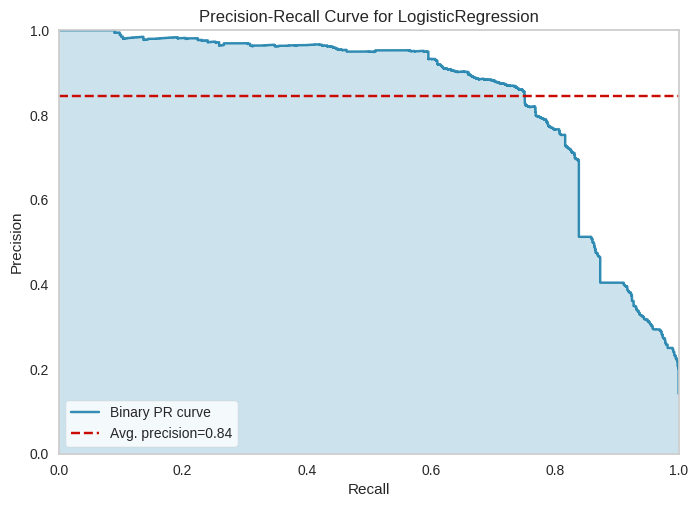

In [17]:
plot_model(tuned_modelo, plot = 'pr')

# Predicciones

In [18]:
from pycaret.classification import *
predicciones = predict_model(tuned_modelo,data=data_unusen)

predicciones.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8844,0.9756,0.7827,0.9860,0.8726,0.7693,0.7866


,UTRNNO,TTIME,TRANS_TYPE,amount,MSGTYPE,Cod_Aprovacion,respuesta,POS_ENTRY_MODE,POS_CONDITION_CODE,ECI,...,Description Español,country_number,Moneda,Ambiente2,Aprobacion_tx,Testeos,Naturaleza,Fraude,prediction_label,prediction_score
0,144798988916,2023-12-08T18:17:12.353,774,"46,00",1120,546669,-1,7,0,0,...,Transacción Aprobada,840,US DOLLAR,Presente,Aprobada,0,credito,0,0,0.9963
1,144798990314,2023-12-08T18:17:35.157,774,"300,00",1120,546681,-1,10,8,2,...,Transacción Aprobada,170,PESO COLOMBIANO,No Presente,Aprobada,0,credito,0,0,0.9842
2,144798990645,2023-12-08T18:17:40.920,774,"83300,00",1120,739145,-1,7,0,nan,...,Transacción Aprobada,170,PESO COLOMBIANO,Presente,Aprobada,0,debito,0,0,0.9999
3,144798990922,2023-12-08T18:17:46.723,680,"219990,00",1120,546689,-1,10,59,5,...,Transacción Aprobada,170,PESO COLOMBIANO,No Presente,Aprobada,0,credito,0,0,0.8536
4,144798993329,2023-12-08T18:18:34.913,796,"0,00",1120,nan,909,1,51,7,...,"Tarjeta no válida, captura.",442,EURO,No Presente,Rechazada,1,credito,0,0,0.9943


# Matriz de confusión

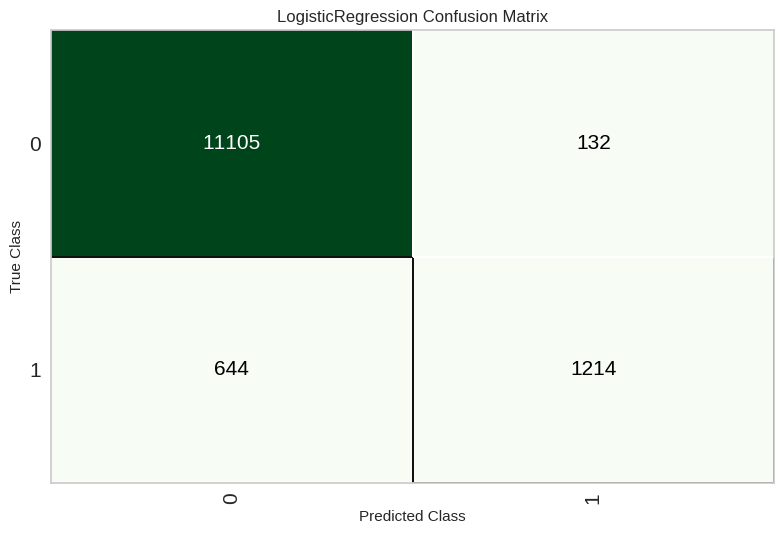

In [19]:
plot_model(tuned_modelo,'confusion_matrix')

In [20]:
# modelo final entrenado con todo el conjunto de datos

final_modelo=finalize_model(tuned_modelo)

In [ ]:
print(final_modelo)

# Guardar modelo

In [21]:
from google.colab import drive
from pycaret.classification import save_model

# Monta Google Drive
drive.mount('/content/drive')

# Guarda el modelo en la carpeta de Google Drive
modelo_a_guardar = final_modelo  # Reemplaza 'final_modelo' con tu modelo
nombre_del_modelo = 'Modelo_Deteccion_trx_fraude'  # Nombre del modelo
ruta_carpeta_drive = '/content/drive/My Drive/Modelos_FA'  # Ruta de la carpeta en Google Drive

# Guarda el modelo
save_model(modelo_a_guardar, f'{ruta_carpeta_drive}/{nombre_del_modelo}')

# Muestra un mensaje de confirmación
print("El modelo se guardó en Google Drive.")

Mounted at /content/drive
Transformation Pipeline and Model Successfully Saved
El modelo se guardó en Google Drive.
